In [16]:
# import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


df = pd.read_csv("out/Clean.csv", sep=";", decimal=",")
df.head()

,CaseNumber,LastName,PostCode,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,HasCholesterol,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,431-06-4243,Richard,99847,40,140,289,0,172,0,0.0,...,1,0,0,1,1,0,0,0,0,1
1,415-39-7809,Sheppard,64192,49,160,180,0,156,0,1.0,...,0,1,0,1,1,0,0,0,1,0
2,517-18-4618,Howard,29132,37,130,283,0,98,0,0.0,...,1,0,0,1,0,1,0,0,0,1
3,634-33-8726,Taylor,12930,48,138,214,0,108,1,1.5,...,0,0,0,1,1,0,0,0,1,0
4,151-40-1619,Mcgrath,79393,54,150,195,0,122,0,0.0,...,0,1,0,1,1,0,0,0,0,1


In [17]:
# Drop non-numeric columns
columns_to_drop = ['CaseNumber', 'LastName', 'PostCode']
df = df.drop(columns=columns_to_drop)

# Separate features from the target variable
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

# Split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.20,
                                       random_state=23)
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc * 100)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression model accuracy (in %): 85.24590163934425
[[63 11]
 [16 93]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        74
           1       0.89      0.85      0.87       109

    accuracy                           0.85       183
   macro avg       0.85      0.85      0.85       183
weighted avg       0.86      0.85      0.85       183


C:\Users\Xanh\PycharmProjects\HeartFailureCase\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


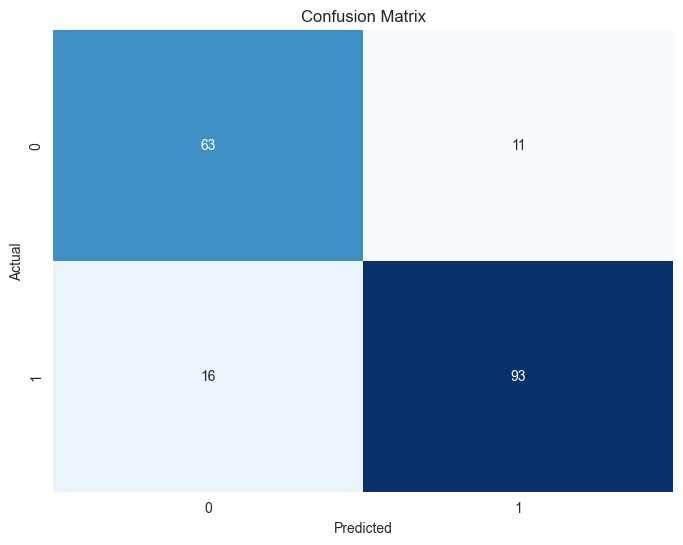

In [18]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a color map
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

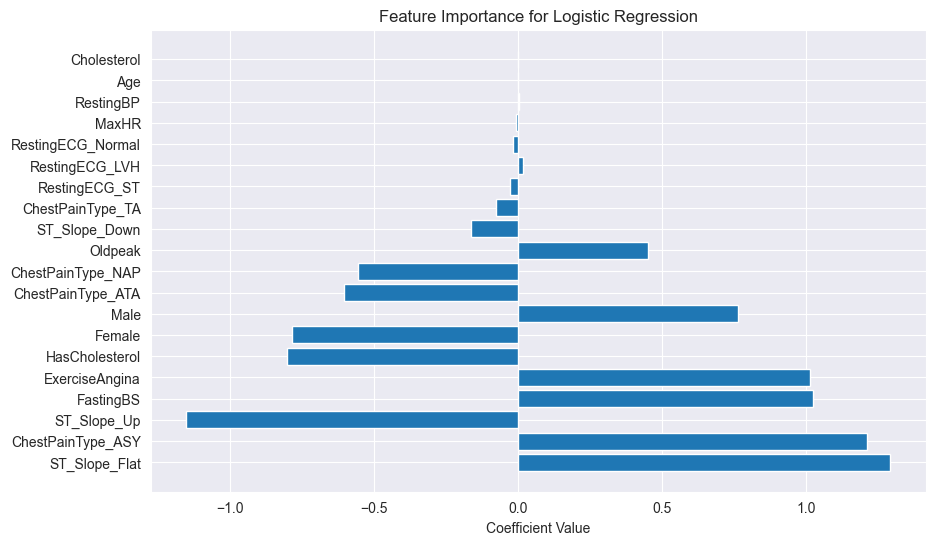

In [19]:
coefficients = clf.coef_[0]

# Get the feature names from the original DataFrame
feature_names = X.columns

# Create a DataFrame to store feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calculate the absolute values of the coefficients
feature_importance_df['Abs_Coefficient'] = abs(feature_importance_df['Coefficient'])

# Sort the features by their absolute coefficient values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Coefficient'], align='center')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Logistic Regression')
plt.show()